Instructions


It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the PopVortex web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the PopVortex Hot 100.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [63]:
secrets_file = open("spotify.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Client ID'],
                                                           client_secret=secrets_dict['Client secret']))

In [2]:
data = pd.read_csv('all_tracks_final.csv')
data.head(3)

,Unnamed: 0,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634,0.000000,0.116,0.437,128.945
1,1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.179,0.000000,0.689,0.625,129.965
2,2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371,0.000007,0.109,0.620,78.558


In [3]:
data = data.drop(['Unnamed: 0'], axis=1)

In [4]:
data.head(3)

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634,0.000000,0.116,0.437,128.945
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.179,0.000000,0.689,0.625,129.965
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371,0.000007,0.109,0.620,78.558


In [5]:
data_features = data.drop(['artist', 'name', 'uri'], axis=1)
data_features.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0,0.0464,0.634,0.000000,0.116,0.437,128.945
1,0.768,0.820,7,-4.630,0,0.0474,0.179,0.000000,0.689,0.625,129.965
2,0.558,0.559,6,-9.222,1,0.0959,0.371,0.000007,0.109,0.620,78.558


In [6]:
scaler= StandardScaler().fit(data_features)
X_prep = scaler.transform(data_features)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

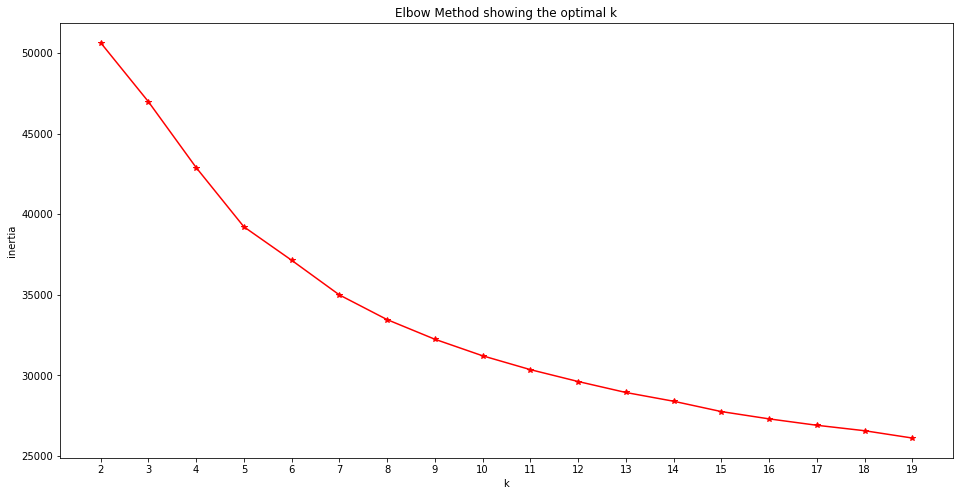

In [9]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')  
#l-bow-point at 5

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

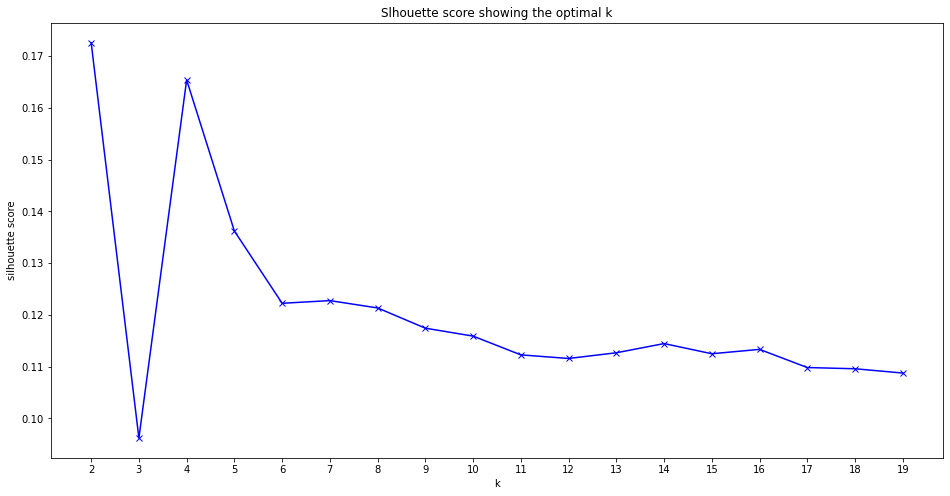

In [10]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')
# silhouette score at 4

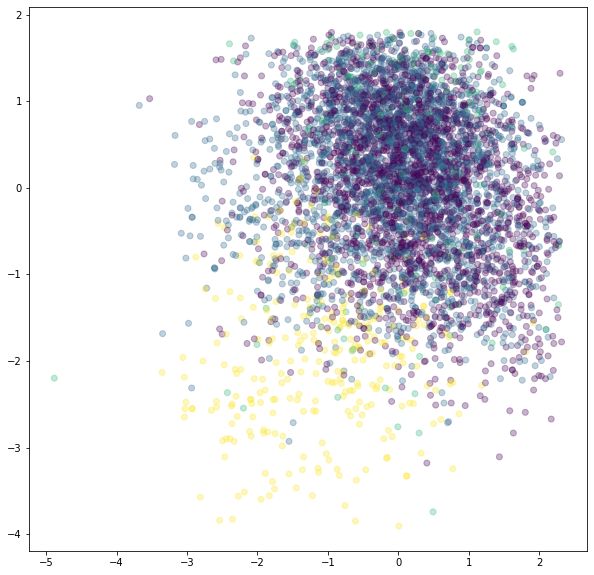

In [16]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(10, 10))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.3)
#plt.scatter(X['alcohol'], X['malic_acid'], c=pred,alpha=0.5)
plt.show()

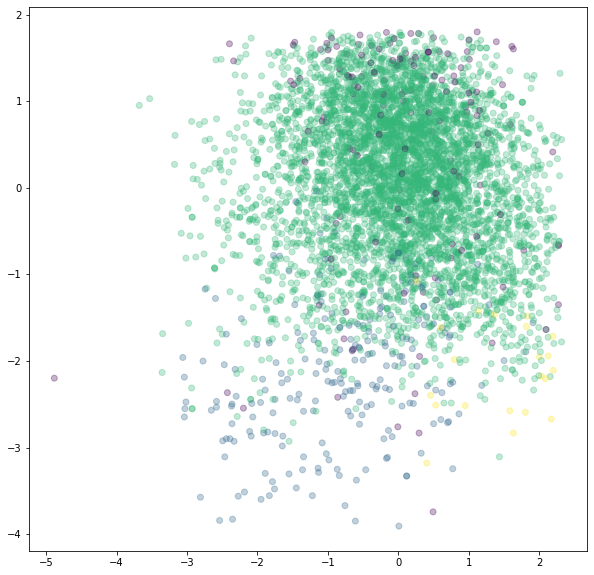

In [18]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='complete')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(10, 10))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.3)
plt.show()

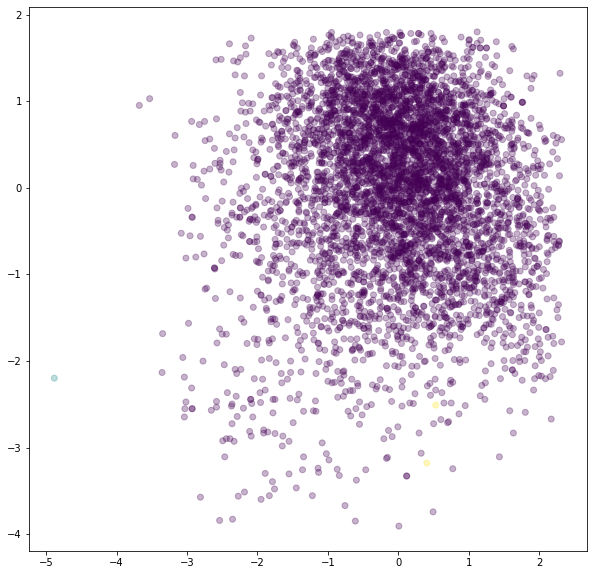

In [20]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='average')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(10, 10))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.3)
plt.show()

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_prep)

PCA()

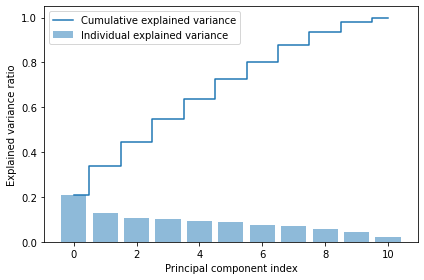

In [22]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
X_pca = pca.transform(X_prep)

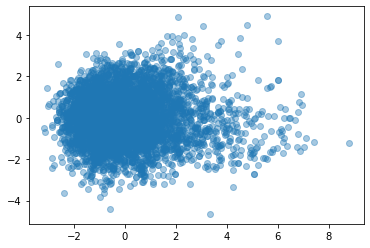

In [25]:
plt.scatter(X_pca[:,0],X_pca[:,1], alpha=0.4)

Text(0.5, 1.0, 'Correlation of PC scores')

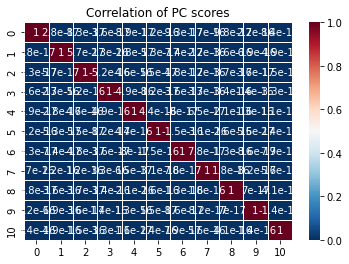

In [27]:
import seaborn as sb
X_train_pca = pca.transform(X_pca)
corr_pc = pd.DataFrame(X_pca).corr()
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

C:\Users\benne\AppData\Local\Temp\ipykernel_9024\2455123733.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


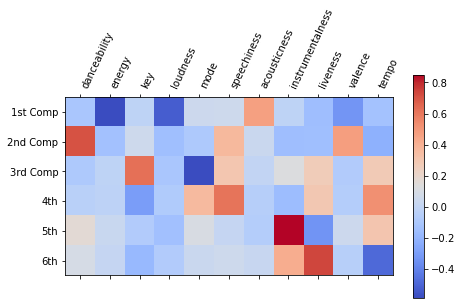

In [30]:
plt.matshow(pca.components_[0:6], cmap='coolwarm')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th','5th','6th'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(data_features.columns)),data_features.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [ ]:
# instrumentalness, energy, loudness and mode has most valueable features....

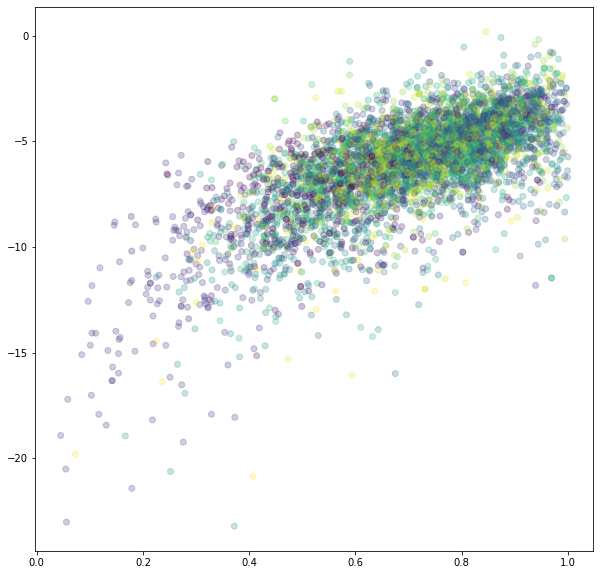

In [33]:
clusters = kmeans.predict(X_prep)
plt.figure(figsize=(10, 10))
plt.scatter(data['energy'], data['loudness'], c=clusters,alpha=0.25)
plt.show()

In [37]:
data_cluster = pd.concat([data,pd.Series(clusters)],axis=1)
data_cluster = data_cluster.rename(columns={0:'clustered'})
data_cluster.head(3)

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clustered
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634,0.000000,0.116,0.437,128.945,0
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.179,0.000000,0.689,0.625,129.965,8
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371,0.000007,0.109,0.620,78.558,0


In [38]:
data_cluster["clustered"].value_counts(dropna=False)

2     504
10    437
11    400
15    397
4     374
5     355
16    328
12    319
7     297
17    285
1     261
0     251
8     240
13    189
3     183
14    168
9     155
6     110
18     42
Name: clustered, dtype: int64

In [39]:
vortex = pd.read_csv('popvortex_top_100_songs.csv')

In [44]:
vortex = vortex.drop(['Unnamed: 0'], axis=1)

In [45]:
vortex.head(3)

,song,artist
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Fast Car,Luke Combs


In [79]:
song_name1 = input('please type a song name: ')

please type a song name: love


In [80]:
artist1 = input('please type a artist name: ')

please type a artist name: korn


In [98]:
if (vortex['artist'].str.contains(artist1)).any() & (vortex['song'].str.contains(song_name1)).any():
    print('My recommendation is:')
    print()
    print(vortex.sample())
elif (data_cluster['artist'].str.contains(artist1)).any() & (data_cluster['name'].str.contains(song_name1)).any():
    data_search = data_cluster[(data_cluster['artist']==artist1) & (data_cluster['name']==song_name1)]
    cluster_row = data_search['clustered'][0]
    cluster = data_cluster[data_cluster['clustered']==cluster_row]
    cluster_reduce = cluster[['artist', 'name']]
    print('My recommendation is:')
    print()
    print(cluster_reduce.sample())
else:
    results = sp.search(q=f"{artist1} {song_name1}", limit=1)
    uri = results["tracks"]["items"][0]["uri"]
    feat = sp.audio_features(uri)
    print(feat)


[{'danceability': 0.552, 'energy': 0.922, 'key': 11, 'loudness': -5.744, 'mode': 0, 'speechiness': 0.1, 'acousticness': 0.000207, 'instrumentalness': 0.000213, 'liveness': 0.35, 'valence': 0.277, 'tempo': 90.046, 'type': 'audio_features', 'id': '1Y74SC05mNh4jS6XLjxh1X', 'uri': 'spotify:track:1Y74SC05mNh4jS6XLjxh1X', 'track_href': 'https://api.spotify.com/v1/tracks/1Y74SC05mNh4jS6XLjxh1X', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1Y74SC05mNh4jS6XLjxh1X', 'duration_ms': 243107, 'time_signature': 4}]
